## **Modelos de Analítica para clientes con usos en tarjetas de créditos**

Fuente: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

### ***Descripción de Variables***

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

## Exploración de Datos

In [1]:
#reinicio de Kernel
%load_ext autoreload 
#Reinicio en carpetas para tomar nuevos cambios
%autoreload 2 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

from pathlib import Path

current_dir = Path(".").resolve()
project_dir = current_dir.parent

In [3]:
file_data = os.path.join(project_dir,"data", "UCI_Credit_Card.csv")
df = pd.read_csv(file_data)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
#Se excluye campo ID ya que no influye en la predicción
df_proccesed = df.iloc[:, 1:]
df_proccesed.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df_proccesed['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [7]:
#col = 'EDUCATION'
#str(df_proccesed[col])
#df_proccesed[col].replace('6','5', inplace=True)

In [8]:
df_proccesed.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## División del DataSet

In [9]:
#División del data set
X = df_proccesed.iloc[:,:-1]
y = df_proccesed.iloc[:,-1]

In [10]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (30000, 23)
y shape: (30000,)


In [11]:
##División del DataSet
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (21000, 23)
y_train shape (21000,)
X_test shape (9000, 23)
y_test shape (9000,)


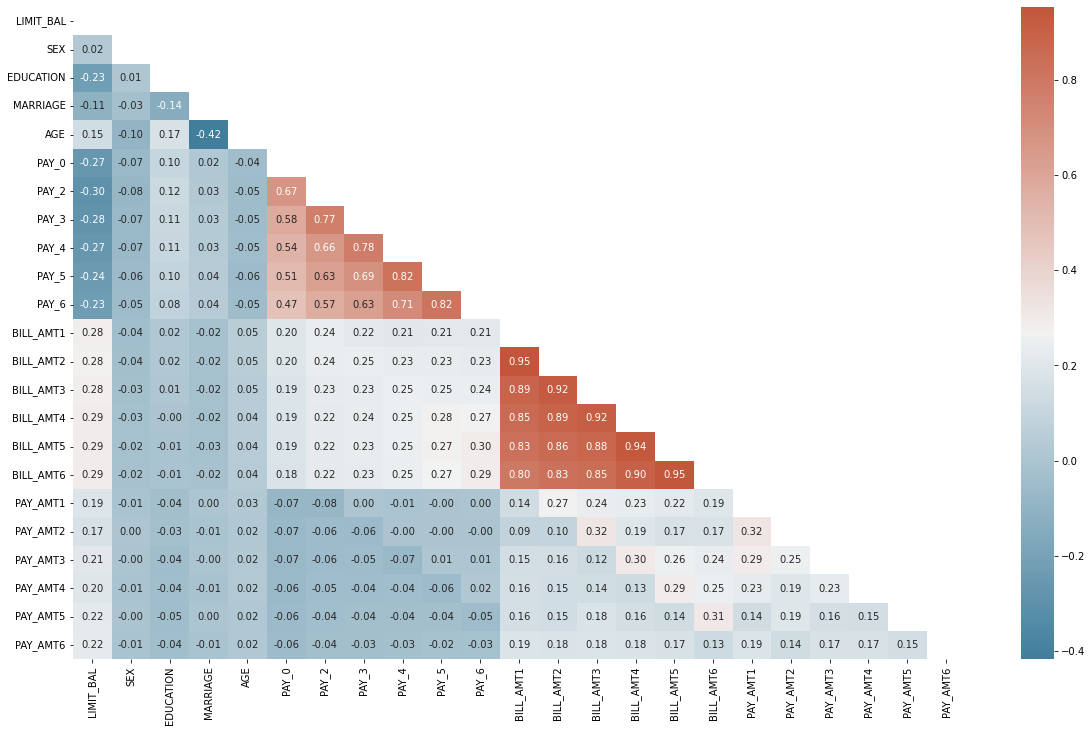

In [12]:
plt.figure(figsize = (20,12))
corr_matrix = X_train.corr()

mask = np.triu(np.ones_like(corr_matrix))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr_matrix,
    mask = mask,
    cmap = cmap,
    annot = True,
    fmt = '.2f'
);

In [13]:
coor_matrix = corr_matrix.abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in  tri_df.columns if any(tri_df[x] >0.9)]

In [14]:
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis = 1)

In [15]:
#Modelos de PCA funcionan mejor con StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled   = sc.transform(X_test)

print("X_train shape", X_train_scaled.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test_scaled.shape)
print("y_test shape", y_test.shape)

X_train shape (21000, 18)
y_train shape (21000,)
X_test shape (9000, 18)
y_test shape (9000,)


## PCA Análisis de Componentes Principales

In [16]:
from sklearn.decomposition import PCA

pca = PCA(0.95).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

In [17]:
rows = X_train.columns

columns = []
for i in range(15):
    columns.append('PC_{}'.format(i+1))
    
feature_importance = pd.DataFrame(
    pca.components_.T,
    index=rows,
    columns=columns
)
feature_importance

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15
LIMIT_BAL,-0.185182,0.339018,-0.063684,-0.415333,-0.084600,-0.196926,-0.028071,0.019242,0.082543,-0.204731,-0.091231,0.396584,-0.028857,-0.623397,-0.137560
SEX,-0.044270,-0.020273,0.082174,0.189509,-0.934796,-0.178872,0.011056,0.028556,-0.010409,0.041429,-0.033391,-0.011725,0.211020,0.021800,0.009145
EDUCATION,0.079873,-0.080859,-0.381140,0.492753,-0.086202,0.526461,0.218860,-0.146701,0.172963,-0.282704,-0.031196,0.265646,-0.113323,-0.215962,-0.060673
MARRIAGE,0.028424,-0.042304,0.635632,0.061968,0.152089,0.221318,0.057652,-0.069086,0.109761,-0.229301,-0.051585,0.230858,0.623233,-0.017129,0.000616
AGE,-0.038941,0.070129,-0.655560,-0.089225,0.107050,-0.101537,-0.065581,0.043383,-0.006145,-0.035895,0.005272,-0.031632,0.708940,0.148575,0.028744
PAY_0,0.342670,-0.020759,-0.024077,-0.051390,0.000159,0.046192,0.048066,-0.017580,-0.029392,0.507346,-0.302908,0.289736,0.053478,0.073302,-0.598383
PAY_2,0.395552,0.006452,-0.020157,-0.044118,-0.003924,0.038508,0.063633,-0.006573,-0.032179,0.330678,-0.159161,0.123646,0.048538,-0.133953,0.315472
PAY_3,0.409552,0.032796,-0.007631,-0.013068,-0.002627,-0.031964,0.034528,0.031614,-0.027480,0.068509,-0.135775,-0.053945,0.037398,-0.234504,0.499144
PAY_4,0.415550,0.052033,-0.004599,-0.007290,-0.011971,-0.075571,-0.011921,0.075521,-0.064432,-0.171471,0.097133,-0.090400,0.016919,-0.166979,0.126593
PAY_5,0.409095,0.072834,0.011903,-0.002355,-0.019180,-0.115724,-0.046393,0.068936,0.061390,-0.261867,0.223730,-0.131911,-0.004809,-0.048878,-0.209164


In [18]:
total_var = pca.explained_variance_ratio_.sum() * 100
total_var
#Porcentaje de varianza explicada

96.79713899372003

In [19]:
variance_ratios = pd.DataFrame(
    pca.explained_variance_ratio_.reshape(1,15),
    columns=columns,
    index=['Explained Variance Ratio']
)
variance_ratios

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15
Explained Variance Ratio,0.253499,0.137214,0.084583,0.059286,0.05622,0.05072,0.049317,0.046458,0.041811,0.038423,0.037075,0.035464,0.030927,0.025263,0.021711


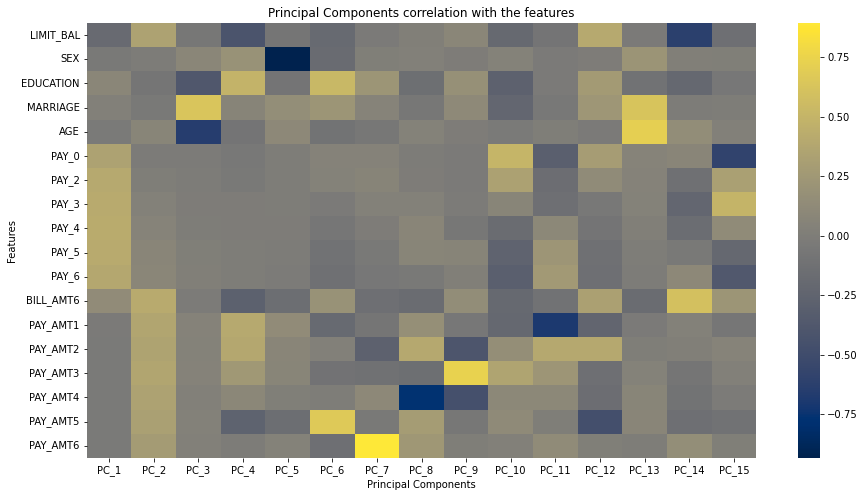

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(feature_importance, cmap="cividis")
plt.title('Principal Components correlation with the features')
plt.xlabel('Principal Components')
plt.ylabel('Features');

## Modelo SVM (Soporte de MAquina de Vectores)

In [21]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train_pca, y_train)

SVC(random_state=42)

In [22]:
y_pred = svc.predict(X_test_pca)

In [23]:
svc.predict(X_test_pca[6].reshape(1,-1)) ## Se predice si paga o no paga

array([0])

### Métricas SVM

In [24]:
from sklearn.metrics import classification_report
print(
    classification_report(y_test, y_pred)
     )

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.35      0.45      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



In [25]:
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)
result_pred = np.column_stack((unique_pred, counts_pred)) 
print (result_pred)

[[   0 7964]
 [   1 1036]]


In [26]:
unique_test, counts_test = np.unique(y_test, return_counts=True)
result_test = np.column_stack((unique_test, counts_pred)) 
print (result_test)

[[   0 7964]
 [   1 1036]]


## Árboles de Decisión

In [35]:
file_data = os.path.join(project_dir,"data", "UCI_Credit_Card.csv")
df = pd.read_csv(file_data)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
labels = y

In [29]:
model_toy = DecisionTreeClassifier(criterion='entropy', random_state = 42, splitter='random')

In [30]:
model_toy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

### Entrenamiento Árbol

In [31]:
from sklearn.tree import  export_text

In [39]:
model_text = export_text(model_toy, feature_names =  ["LIMIT_BAL", "SEX" ,"EDUCATION", "MARRIAGE", "AGE", "BILL_AMT6","PAY_AMT1", "PAY_AMT2", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6" , "PAY_AMT3","PAY_0","PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6" ])
print(model_text)

|--- LIMIT_BAL <= 204493.14
|   |--- BILL_AMT6 <= 2.93
|   |   |--- PAY_AMT5 <= 0.41
|   |   |   |--- PAY_AMT2 <= 1.18
|   |   |   |   |--- PAY_AMT1 <= 0.24
|   |   |   |   |   |--- BILL_AMT6 <= 1.49
|   |   |   |   |   |   |--- LIMIT_BAL <= 23602.62
|   |   |   |   |   |   |   |--- PAY_AMT5 <= -0.20
|   |   |   |   |   |   |   |   |--- LIMIT_BAL <= 18722.04
|   |   |   |   |   |   |   |   |   |--- PAY_AMT4 <= -1.94
|   |   |   |   |   |   |   |   |   |   |--- EDUCATION <= 2.89
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- EDUCATION >  2.89
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- PAY_AMT4 >  -1.94
|   |   |   |   |   |   |   |   |   |   |--- PAY_3 <= 1952.74
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- PAY_3 >  1952.74
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|

In [52]:
pred_toy = model_toy.predict(X_test)

In [53]:
model_toy.score(X_test, y_test)

0.7281111111111112

## Regresión Logística

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [43]:
y_pred_lr = lr.predict(X_test)

In [44]:
print('Lr Pred: ',np.unique(y_pred_lr, return_counts=True)) #prediccion

Lr Pred:  (array([0]), array([9000]))


In [45]:
from sklearn.metrics import classification_report
print(
    classification_report(y_test, y_pred_lr)
     )

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


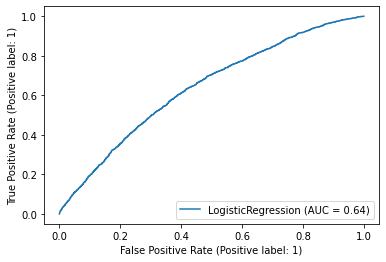

In [50]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_test, y_test);

## Resultados Generales de los Modelos
_____________________________
Se eligen los modelos SVM, Regresión Lineal y árboles de decisión 

Los porcentajes de predicción por modelo son los siguientes, donde se da una mayor predicción utilizando el Modelo de Soporte de Maquina de Vectores.

*Regresión Logistica:            78%* \
*Árboles de Decisión:            72%* \
*Soporte de Maquina de Vectores: 82%* 

